# 0) Introdução

A classificação de documentos é uma tarefa fundamental no direito e muitos atos jurídicos dependem da correta categorização de documentos como petições, sentenças, contratos, e muitos outros. 

Um exemplo disso é o recurso em sentido estrito, previsto no artigo 581 do Código de Processo Penal, que só poderá ser interposto nas hipóteses elencadas nos incisos do referido artigo. Toda decisão em processo criminal, portanto, pode ser classificada em uma das duas categorias: passível de interposição de recurso em sentido estrito ou não. Nesse caso, um erro na rotulação de uma decisão pode reduzir ou até mesmo eliminar as chances de vitória de uma das partes.

A classificação computacional de documentos judiciais é um passo importante na virtualização da prática jurídica. A capacidade de computadores determinarem, com alto grau de precisão e confiabilidade, a qual categoria, entre uma coleção de possibilidades conhecidas, um documento pertence é não apenas um fim em si mesmo, mas também um estágio inicial na construção de sistemas artificiais que manifestem alguma espécie de "inteligência" sobre o direito.

Neste artigo, vamos explorar a construção de um modelo de classificação de sentenças crimininais, a fim de apresentar e desmistificar para o público jurídico técnicas computacionais como a raspagem de dados e o aprendizado de máquina.

# 1) Descrição do problema

No direito brasileiro, a sentença no processo penal é o ato jurídico que declara a culpabilidade de alguém. No jargão popular, é a sentença que dirá se o acusado é "culpado ou inocente". É fácil perceber a extrema importância da sentença dentro de um processo criminal. De fato, analisando-se apenas sentenças criminais, é posśivel obter informações como a proporção de condenações por absolvição em um determinado universo, ou mesmo dados mais específicos, como a posição de determinado magistrado sobre a aplicação do princípio da insignificância nos casos de furto de bagatela.

Porém, essas informações só passarão a ter algum significado se forem analisadas um grande número de sentenças. Dezenas de milhares. Com efeito, quanto mais sentenças forem analisadas, mais fortes serão nossas inferências sobre os dados obtidos. Mas como obter essas sentenças? E como analisar cada uma delas para extrair termos significantes que nos indiquem o conteúdo e o resultado do processo?

Esses, portanto, são os problemas que teremos que enfrentar computacionalmente:

    1) Obter um grande número de sentenças de processos criminais.
    2) Classificar cada sentença em sua categoria apropriada.
    3) Analisar os dados obtidos em busca de relações úteis.

# 2) Obtenção de dados: web scraping

O primeiro passo é obter um grande número de sentenças de processos criminais. Infelizmente não há um banco de dados centralizado onde possamos baixar diretamente x mil sentenças para nosso computador. Será preciso trabalhar um pouco nisso. Por sorte, alguns tribunais disponibilizam em seus sites repoitórios de sentenças. Vamos tirar proveito [dessa ferramenta](https://www5.tjmg.jus.br/jurisprudencia/sentenca.do) do site do Tribunal de Justiça do Estado de Minas Gerais para poder baixar o máximo de sentenças possíveis de seu repositório.

Nesse tipo de problema, obter os dados é sempre uma tarefa há ser considerada. Realizar o download manual de milhares de senteças seria impensável, logo, utilizaremos uma técnica conhecida como [web scraping](https://pt.wikipedia.org/wiki/Coleta_de_dados_web) para automaticamente baixar milhares de sentenças do site do TJMG.

Cada página na internet é, na verdade, um código. Esse código é "lido" (interpretado) pelo navegador, que tem a tarefa de "traduzir" o código, um conjunto de instruções textuais, em uma página web gráfica, com imagens, links, etc. Por exemplo, a página do Supremo Tribunal Federal, quando acessada por um navegador, se parece assim:

![Site STF](imgs/stf.png)

Mas o seu código é assim (um trecho):

![Html STF](imgs/htmlstf.png)

Por mais que o código possa parecer bastante críptico, é possível reconhecer alguns elementos familiares, como o link para a notícia (/noticias/verNoticiaDetalhe.asp?idConteudo=447052&amp;ori=1) e seu título (Ministro Toffoli suspende decisão que invadiu competência do STF para recursos em Juizados Especiais). Sabendo disso, é possível escrever um programa que instrua o computador a navegar pela internet utilizando apenas o código de cada página, coletando assim toda a informação desejada e dispensando o uso de navegadores. 

Aplicando esse método na página de busca por sentenças do TJMG, podemos escrever um programa que buscará um termo genérico, como "crime", em cada vara criminal disponível. Para cada busca, o programa acessará a página de resultados, e salvará cada sentença encontrada individualmente em uma pasta no computador. Dessa forma foi possível coletar aproximadamente quarenta mil sentenças criminais, proferidas entre 2014 e 2020, oriundas de varas criminais dos principais municípios do Estado de Minas Gerais.


# 3) Classificação humana: labels

Ultrapassada a primeira etapa e coletada uma quantidade satisfatórias de sentenças, agora é necessário classificá-las em categorias próprias. Um humano levaria centenas de horas para classificar manualmente milhares de centenas e para agilizar esse tedioso processo vamos utilizar algumas técnicas de aprendizado de máquinas.

O objetivo nessa etapa é fazer com que o computador seja capaz de classificar automaticamente sentenças em categorias pré-determinadas. Somos livres para criar e trabalhar com as categorias que desejarmos. Essa escolha, naturalmente, influenciará na qualidade das classificações e das informações que poderão ser inferidas a partir delas.

Para esse projeto vamos classificar as sentenças em três categorias, seguindo as seguintes regras:
    * Sentenças Condenatórias: Sentenças que condenam pelo menos um dos acusados por pelo menos um crime.
    * Sentenças Absolutórias: Sentenças que absolvem todos os acusados por todos os crimes.
    * Sentenças Neutras:
        * Prescrição
        * Embargos de Declaração
        * Rejeição da Queixa-Crime
        * Ilegitimidade da parte
        * Coisa julgada
        * Extinção da punibilidade por cumprimento de suspensão condicional
        * Fixação da pena
        * Pronúncia
        * Arquivamento de inquérito
        * Medidas protetivas
        * Restituição de bens
        * Perdão judicial

Como em toda classificação, algumas áreas cinzentas surgem, pois alguns objetos parecem pertecer a mais de uma categoria. A qual grupo pertencem, por exemplo, as sentenças de perdão judicial?

Outro dos benefícios da aplicação do aprendizado de máquinas, é que não precisamos criar rols exaustivos de atributos em cada categoria, como fiz com as sentenças neutras acima. A esperança é justamente que os modelos matemáticos e computacionais que vamos utilizar sejam sofisticados o suficiente para serem capazes de categorizar "corretamente" até elementos novos ainda não vistos, levando em consideração sua semalhança com elementos já conhecidos.

Existem diversas técnicas que podem ser utilizadas para que o computador possa "aprender" a classificar documentos. Para esse projeto, vamos utilizar o [aprendizado supervisionado](https://pt.wikipedia.org/wiki/Aprendizado_de_m%C3%A1quina#Tipos_de_problemas_e_tarefas).

Nesse tipo de abordagem, é preciso primeiro "informar" ao computador quais são as categorias em que desejamos dividir nossos documentos e fornecer alguns exemplos de documentos com sua respectiva classificação. O computador criará funções matemáticas para descrever os documentos fornecidos como exemplos em suas categorias, e para cada nova entrada desconhecida, tentará aproxima-la matematicamente dessas funções.

Para dar essa carga inicial de conhecimento ao nosso modelo, é preciso separar humanamente algumas das sentenças que coletamos nas categorias que definimos acima. Podemos fazer isso abrindo aleatoriamente sentenças de nosso banco, analisando-as e salvando uma cópia em uma pasta para o seu tipo. Repetindo esse processo extremamente tedioso algumas centenas de vezes, terminaremos com três pastas, e, dentro de cada uma delas, sentenças que temos certeza que pertencem à uma determinada categoria.

Para realizar essa etapa, selecionei sentenças aleatórias das 3ª, 4ª, 5ª, 7ª, 8ª, 9ª e 10ª Varas Criminais de Belo Horizonte. Para cada vara, classifiquei manualmente sentenças até encontrar 20 sentenças absolutórias. Para alcançar essse número em algumas varas, foi preciso analisar centenas de documentos:

    Quantidade de condenações em cada vara para se classificarem 20 absolvições:
    
     3ª Vara Criminal: 268
     4ª Vara Criminal: 350
     5ª Vara Criminal:  80
     7ª Vara Criminal:  95
     8ª Vara Criminal: 285
     9ª Vara Criminal: 122
    10ª Vara Criminal: 156

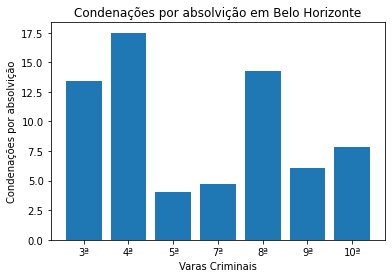

In [1]:
import matplotlib.pyplot as plt
varas = ["3ª", "4ª", "5ª", "7ª", "8ª", "9ª", "10ª"]
condenacoes_20_absolvicoes = [268, 350, 80, 95, 285, 122, 156]
condenacoes_por_absolvicao = [x/20 for x in condenacoes_20_absolvicoes]
plt.bar(varas, condenacoes_por_absolvicao)
plt.xlabel("Varas Criminais")
plt.ylabel("Condenações por absolvição")
plt.title("Condenações por absolvição em Belo Horizonte")
plt.show()

Ao final desse processo, foi possível construir um banco de sentenças já classificadas contendo: 

* 140 sentenças absolutórias
* 140 sentenças condenatórias
* 100 sentenças neutras

Nessa etapa definimos que utilizaremos três categorias de sentenças em nosso modelo e preparamos um banco de sentenças humanamente classificadas contendo uma pequena amostra de documentos que pertecem a cada categoria. 

A seguir, programaremos o computador para realizar uma primeira classificação e acompanharemos os primeiros resultados.

# 4) Classificação computacional: Naive Bayes

Agora de posse de um banco contendo milhares de centenas não classificadas e um outro contendo algumas poucas centenas de sentenças já classificadas, nossa esperança é que possa o computador replicar no banco "cru" as rergas de classificação que "descobrir" no já categorizado.

Para "descobrir" essas regras, o computador irá criar funções capazes de descrever matematicamente cada categoria apresentada de acordo com os atributos dos documentos fornecidos. Mas o computador não criará essas relações sozinho, de forma autômata, e sim executará um programa que contém instruções desenvolvidas por humanos que determinam a abordagem matemática a ser tomada.

Existem diversos desses programas, que são chamados classificadores. Cada classificador possui características próprias como o grau de complexidade, o custo computacional, entre outras, que influenciam no seu grau de precisão. 

Como traduzir isso para o nosso projeto?

Para nós, cada problema é uma sentença, que precisa ser classificada em uma das três categorias pré-determinadas. Cada sentença, por sua vez, possui como atributos as palavras de seu texto. 

A partir disso, e utilizando o banco de sentenças já classificadas, podemos criar uma lista contendo todas as palavras que aparecem nesses documentos, em ordem, das palavras que mais aparecem às mais raras. Essa tarefa, impossível para um ser humano, é banal para um computador.

Essa lista será nosso vocabulário. A partir dela podemos percorrer todas as sentenças que temos em nosso banco de sentenças já classificadas e, para cada uma dessas sentenças, podemos comparar suas palavras (seus atributos) com as do vocabulário. Como temos certeza a respeito da categoria de cada uma dessas sentenças, a esperança é que o classificador possa estabelecer relações entre quais palavras aparecem com mais frequência em quais categorias.

Dessa forma, seria possível classificar um novo documento ainda não visto, a partir da análise de suas palavras e de sua comparação com as palavras de nosso vocabulário, utilizando as relações definidas pelo classificador. 



O primeiro classificador que utilizaremos nesse projeto é da família chamada [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier), ou Bayes Ingênuo. 

Os classificadores dessa família funcionam sob a premissa de que o valor de cada um dos atributos estudados pode ser calculado de forma independente, isso é, sem levar em consideração o valor dos outros atributos envolvidos no problema. Em nosso caso, o classificador atribuirá uma probabilidade a cada palavra econtrada em cada sentença, levando em consideração apenas a probabilidade que cada palavra tem de contribuir para a categorização daquele documento, ignorando as correlações que palavras de um mesma sentença possuem entre si e como isso pode influenciar no cálculo final.

Por exemplo, em uma sentença que contenha o termo "princípio da insignificância", um classificador do tipo Bayes Ingênuo irá analisar a probabilidade que a palavra "princípio" possui de integrar uma sentença de cada categoria, e fara o mesmo para os termos "da" e "insignificância", ignorando que existe uma correlação entre esses três termos que pode influenciar na probabilidade final de classificação da sentença.

Implementando então um classificador Naive Bayes utilizando o banco de sentenças classificadas que produzimos podemos realizar a primeira classificação computacional. Ela, porém, não produz resultados eficazes alcançando apenas entre 40 e 60% de média de acerto.

É preciso refinar o método para alcançar resultados melhores. Particularmente, há dois pontos que podemos desenvolver melhor, agora que já assentamos algumas bases.

* Um banco de sentenças já classificadas com pouco mais de cem documentos para cata categoria é muito pequeno.
* O classificador Bayes Ingênuo, embora eficaz, pode ser aprimorado.

# 5) Classificação humana 2: aprendizado supervisionado

Utilizando a primeira classificação computacional foi possível dividir automaticamente, ainda que de forma precária, o banco inicial "cru" contendo todas as sentenças nas três categorias estudadas. Embora muitos erros tenham ocorrido, essa divisão precária facilitou muito o processo de classificação humana de sentenças absolutórias. Antes, em algumas varas, era preciso classificar quinze sentenças condenatórias para cada sentença absolutória. Agora, em torno de duas.

De posse das sentenças classificadas pelo primeiro modelo computacional, extendi o banco de sentenças humanamente classificadas, que passou a possuir:

* 314 absolutórias
* 305 condenatórias
* 200 neutras

Esse mesmo processo foi repetido uma vez mais, produzindo, ao final, um banco de sentenças classificadas contendo:

* 656 absolutórias
* 611 condenatórias
* 424 neutras

# 6) Classificação computacional 2: LSVC e SGDC

Agora, de posse de um banco inicial quase cinco vezes maior, podemos também substituir nosso classificador por um modelo um pouco mais complexo. Na verdade, utilizar um modelo composto por outros dois classificadores, que atuarão em conjunto. 

Assim, no lugar de um único classificador da família dos Naive Bayes, vamos utilizar classificadores de duas famílias diferentes: [Máquinas de Vetores de Suporte](https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM) e [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

Esses classificadores utilizam a mesma premissa que vimos anteriormente, de criar uma lista com o vocabulário completo de todas as sentenças classificadas e analisar cada sentença conhecida criando funções matemáticas que permitirão associar cada entrada a um tipo de saída diferente, porém utilizam métodos diferentes da análise da probabilidade de cada termo resultar em um tipo. Esses métodos são um pouco mais complexos e podem ser consultados nos links fornecidos.

A esperança ao utilizarmos dois classificadores diferentes é de reduzir a margem de erro. Para tanto, ao classificar as sentenças do banco "cru", vamos considerar como classificadas apenas aquelas em que ambos os classificadores concordarem a respeito de suas categorias. As demais serão "descartadas", ou seja, classificadas em uma quarta categoria: as falhas.

# 7) Resultados

Após realizar a classificação computacional, com um banco de sentenças classificadas expandido e a utilização de dois classificadores em conjunto, foi possível obter uma margem de acerto entre 94 e 97%, desconsiderando-se as falhas decorrentes de discordância entre os classificadores.

Embora as falhas representem uma perda na quantidade de sentenças que poderemos utilizar para criar inferências, elas também representam um aumento na qualidade da informação que utilizaremos. É preciso alcançar um equilíbrio nesse aspecto, que nos permita aproveitar o máximo possível de informação, sem prejudicar a qualidade do resultado.

Voltando às Varas que foram utilizadas na primeira classificação humana, esse foi o resultado de uma das passagens do modelo que construímos nesse projeto:

    3ª Vara Criminal
        absolutorias: 60 - 7.38% 
        condenatorias: 732 - 90.04% 
        neutras: 5 - 0.62% 
        falhas: 16 - 1.97%

    4ª Vara Criminal
        absolutorias: 237 - 6.79% 
        condenatorias: 2385 - 68.36% 
        neutras: 741 - 21.24% 
        falhas: 126 - 3.61%

    5ª Vara Criminal
        absolutorias: 114 - 11.62% 
        condenatorias: 779 - 79.41% 
        neutras: 37 - 3.77% 
        falhas: 51 - 5.20%

    7ª Vara Criminal
        absolutorias: 261 - 15.50% 
        condenatorias: 1388 - 82.42% 
        neutras: 8 - 0.48% 
        falhas: 27 - 1.60%
        
    8ª Vara Criminal
        absolutorias: 112 - 4.87% 
        condenatorias: 2136 - 92.91% 
        neutras: 30 - 1.30% 
        falhas: 21 - 0.91%

    9ª Vara Criminal
        absolutorias: 218 - 13.85% 
        condenatorias: 1114 - 70.78% 
        neutras: 38 - 2.41% 
        falhas: 204 - 12.96%

    10ª Vara Criminal
        absolutorias: 259 - 13.09% 
        condenatorias: 1376 - 69.53% 
        neutras: 282 - 14.25% 
        falhas: 62 - 3.13%

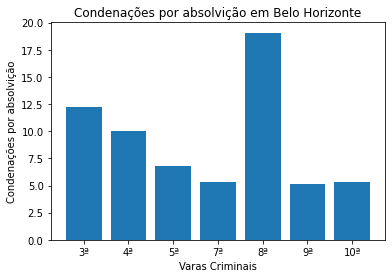

In [3]:
import matplotlib.pyplot as plt
varas = ["3ª", "4ª", "5ª", "7ª", "8ª", "9ª", "10ª"]
condenacoes = [732, 2385, 779, 1388, 2136, 1114, 1376]
absolvicoes = [60, 237, 114, 261, 112, 218, 259]
condenacoes_por_absolvicao = [x/y for x, y in zip(condenacoes, absolvicoes)]
plt.bar(varas, condenacoes_por_absolvicao)
plt.xlabel("Varas Criminais")
plt.ylabel("Condenações por absolvição")
plt.title("Condenações por absolvição em Belo Horizonte")
plt.show()

# 8) Análise textual: processamento de linguagem natural

-- Em elaboração --